<a href="https://colab.research.google.com/github/jebalisoumaya/Machine-Learning/blob/main/Machine_Learning_Algorithms_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective

In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.


#Part1: supervised learning

Load the dataset of kidney disease.


In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("kidney_disease.csv")
df

<ipython-input-3-1456bb7416d5>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv("kidney_disease.csv",index_col = 0, parse_dates = [0], squeeze = True)


FileNotFoundError: [Errno 2] No such file or directory: 'kidney_disease.csv'

In [ ]:
df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific_gravity','al':'albumin','su':'sugar','rbc':'red_blood_cells','pc':'pus_cell','pcc':'pus_cell_clumps','ba':'bacteria','bgr':'blood_glucose_random','bu':'blood_urea','sc':'serum_creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed_cell_volume','wc':'white_blood_cell_count','rc':'red_blood_cell_count','htn':'hypertension','dm':'diabetes_mellitus','cad':'coronary_artery_disease','appet':'appetite','pe':'pedal_edema','ane':'anemia','classification':'class'},inplace=True)

In [ ]:
df

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df1=df.copy()

In [ ]:
df1

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


# Data preprocessing

In [ ]:
#% of missing values on each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

id                          0.00
age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
hemoglobin                 13.00
packed_cell_volume         17.50
white_blood_cell_count     26.25
red_blood_cell_count       32.50
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
class                       0.00
dtype: float64

In [ ]:
#summary on the number of missing values on each column
df1.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
df.drop('id', axis=1,inplace=True)
df1.drop("id", axis=1,inplace=True)

##méthode classique

df1

In [ ]:
df1[["packed_cell_volume",	"white_blood_cell_count",	"red_blood_cell_count"	]]=df1[["packed_cell_volume",	"white_blood_cell_count",	"red_blood_cell_count"	]].apply(pd.to_numeric,errors='coerce')

In [ ]:
for data in df1:
    if not (df1[data].dtypes== 'object'):
      df1[data].fillna(value=df1[data].median(), inplace=True)
df1.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

In [ ]:
for data in df1:
   if  (df1[data].dtypes== 'object'):
      df1[data].fillna(value=df1[data].mode()[0], inplace=True)


In [ ]:
df1.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

## K-Nearest Neighbor Imputation

In [ ]:
# transformer une variable d’un type dans un autre
df[["packed_cell_volume",	"white_blood_cell_count",	"red_blood_cell_count"	]]=df[["packed_cell_volume",	"white_blood_cell_count",	"red_blood_cell_count"	]].apply(pd.to_numeric,errors='coerce')

In [ ]:
df.isnull().sum()


age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

for data in df:
    if not (df[data].dtypes== 'object'):
      df[data] = knn_imputer.fit_transform(df[[data]])

df.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
hemoglobin                   0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
#Categorical Data
for data in df:
   if  (df[data].dtypes== 'object'):
      df[data].fillna(value=df[data].mode()[0], inplace=True)
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
df1

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

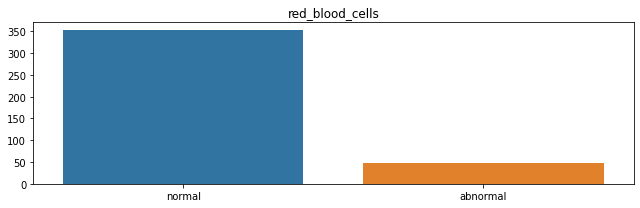

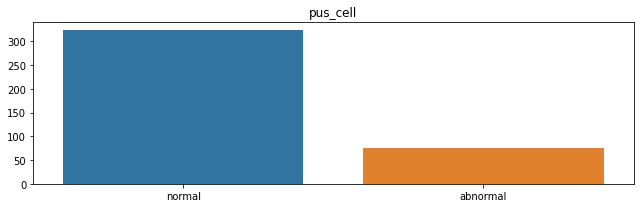

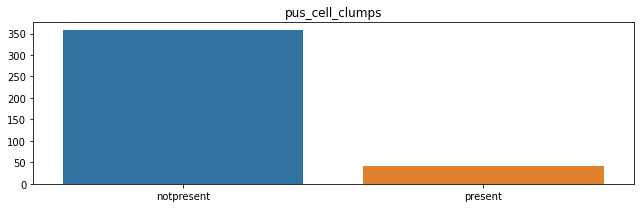

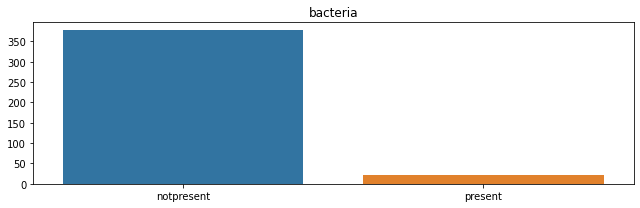

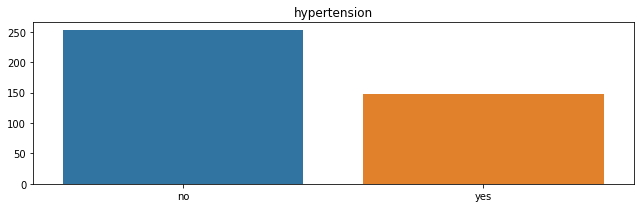

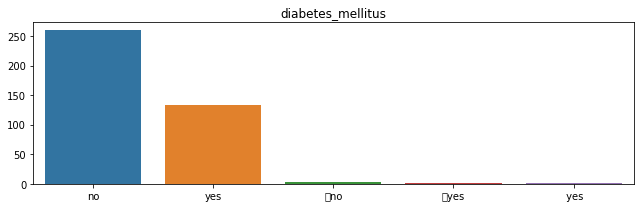

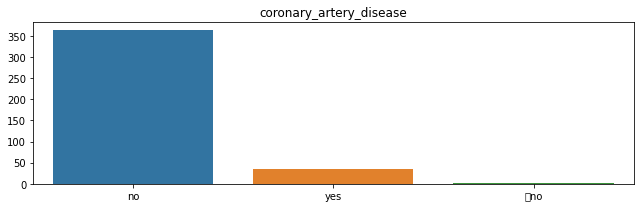

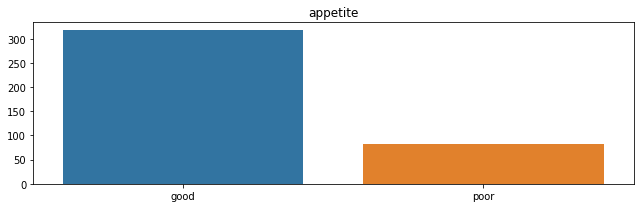

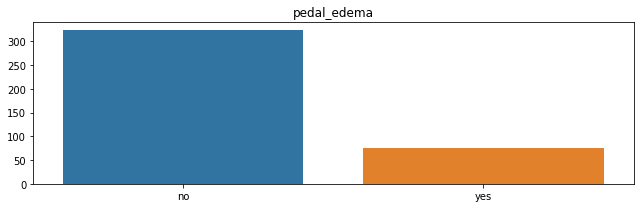

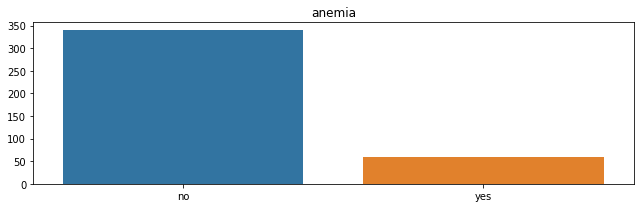

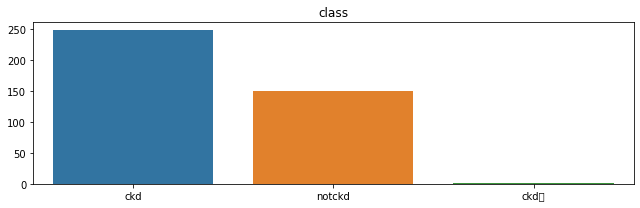

In [ ]:
for data in df:
    if (df[data].dtypes== 'object'):
     plt.figure(figsize=(9,3))
     sns.barplot(df[data].value_counts().index ,df[data].value_counts().values )
     plt.title(data)
     plt.tight_layout()

In [ ]:
df["diabetes_mellitus"].value_counts()

no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabetes_mellitus, dtype: int64

In [ ]:
df1["diabetes_mellitus"].value_counts()

no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabetes_mellitus, dtype: int64

In [ ]:
df["diabetes_mellitus"] = df['diabetes_mellitus'].replace(['\tno','\tyes'," yes"],['no','yes',"yes"])


In [ ]:
df1["diabetes_mellitus"] = df1['diabetes_mellitus'].replace(['\tno','\tyes'," yes"],['no','yes',"yes"])


In [ ]:

df["coronary_artery_disease"].value_counts()

no      364
yes      34
\tno      2
Name: coronary_artery_disease, dtype: int64

In [ ]:
df1["coronary_artery_disease"].value_counts()

no      364
yes      34
\tno      2
Name: coronary_artery_disease, dtype: int64

In [ ]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(['\tno'],'no')


In [ ]:
df1['coronary_artery_disease'] = df1['coronary_artery_disease'].replace(['\tno'],'no')


In [ ]:
 df1["class"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64

In [ ]:

df1['class'] = df1['class'].replace(['ckd\t'],'ckd')
df['class'] = df['class'].replace(['ckd\t'],'ckd')

In [ ]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [ ]:
numerical_features1 = []
categorical_features1 = []

for i in df1.columns:
    if df1[i].nunique()>7:
        numerical_features1.append(i)
    else:
        categorical_features1.append(i)

### data visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

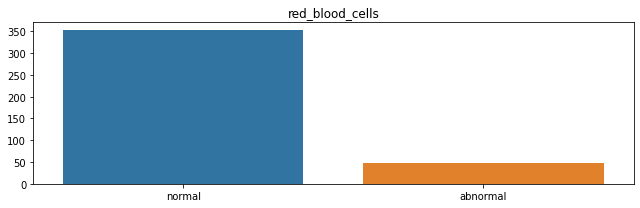

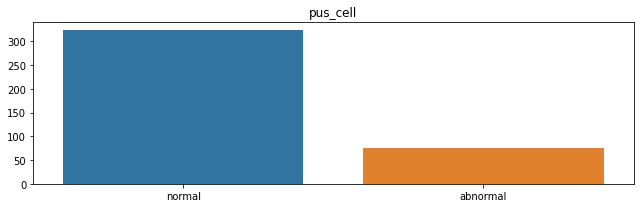

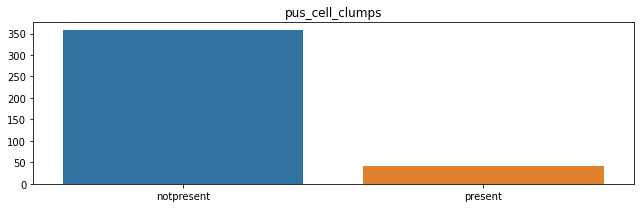

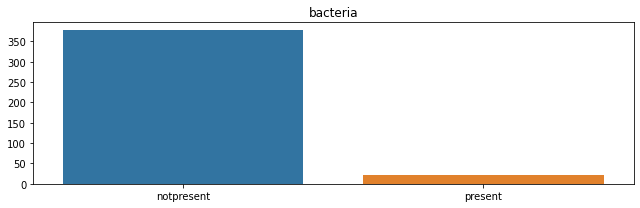

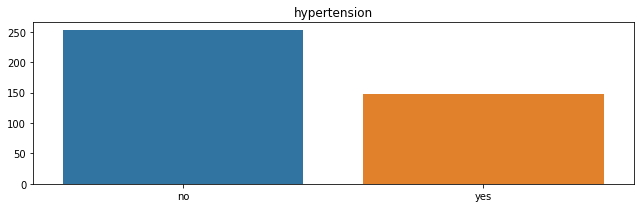

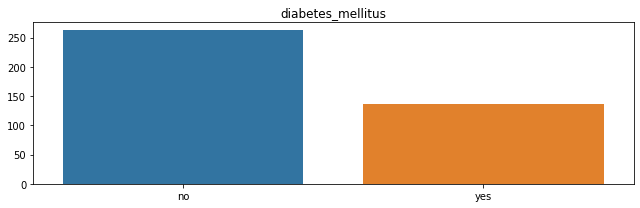

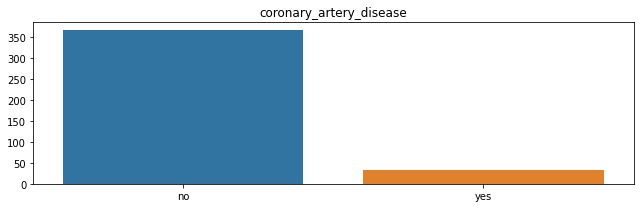

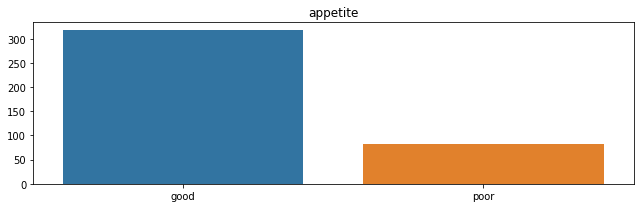

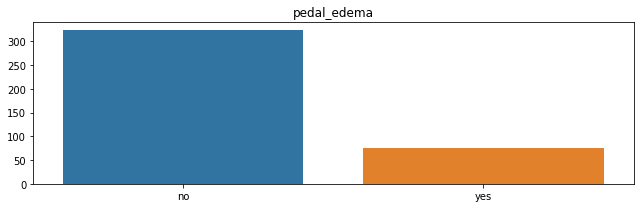

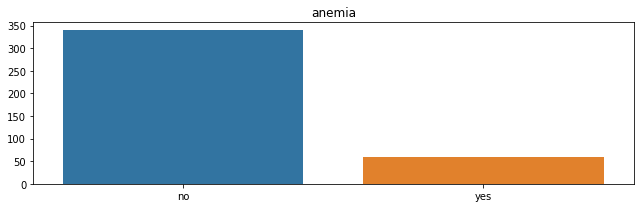

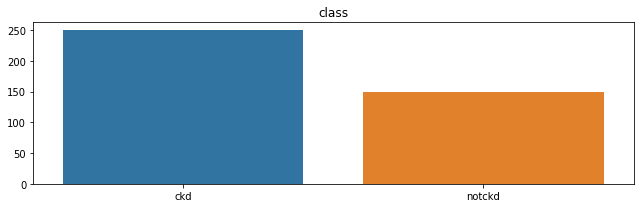

In [ ]:
for data in df1:
    if (df1[data].dtypes== 'object'):
     plt.figure(figsize=(9,3))
     sns.barplot(df1[data].value_counts().index ,df1[data].value_counts().values )
     plt.title(data)
     plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

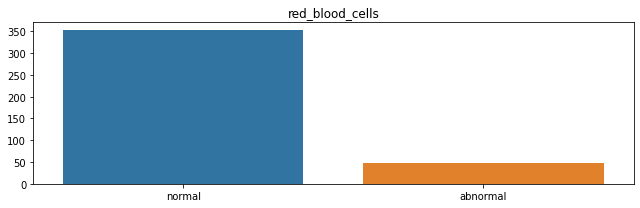

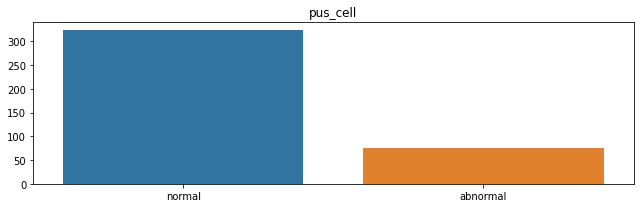

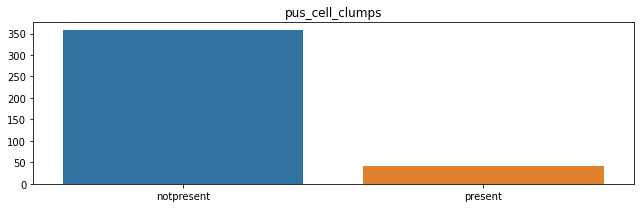

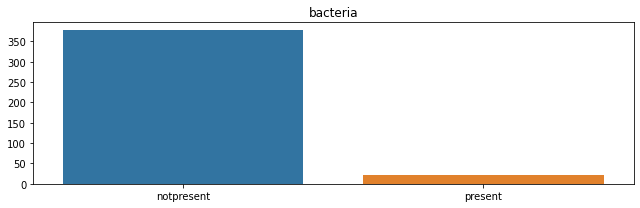

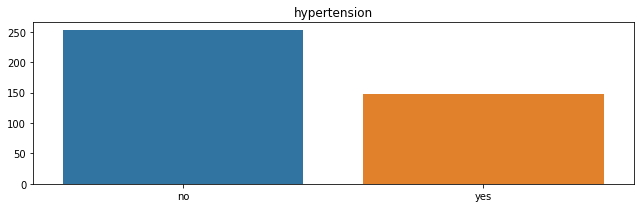

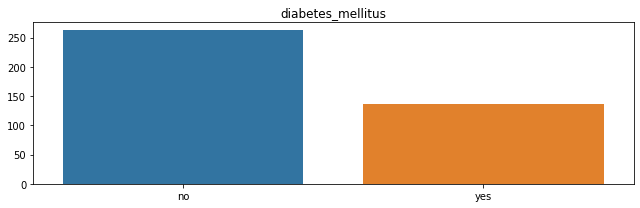

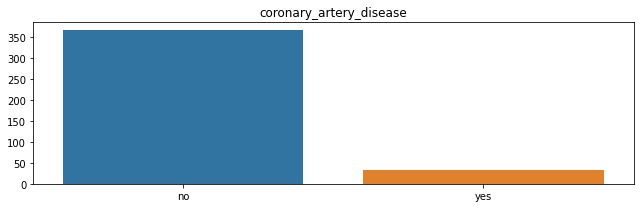

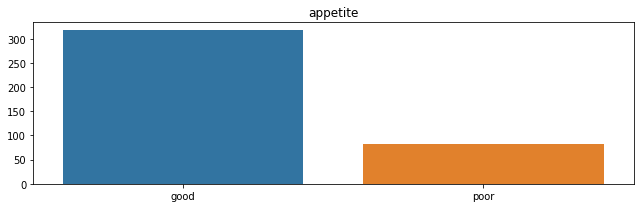

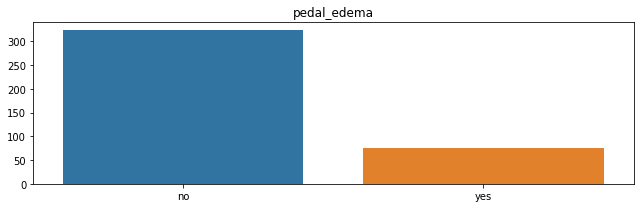

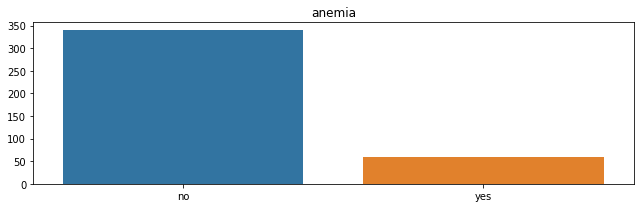

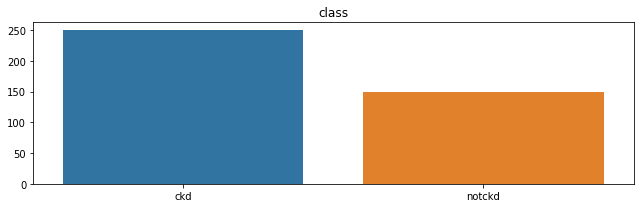

In [ ]:
for data in df:
    if (df[data].dtypes== 'object'):
     plt.figure(figsize=(9,3))
     sns.barplot(df[data].value_counts().index ,df[data].value_counts().values )
     plt.title(data)
     plt.tight_layout()


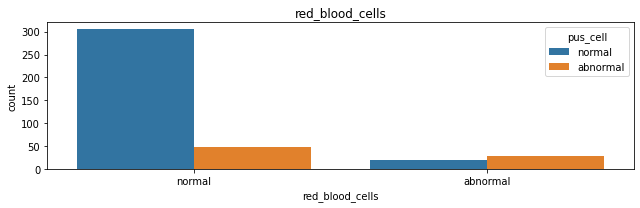

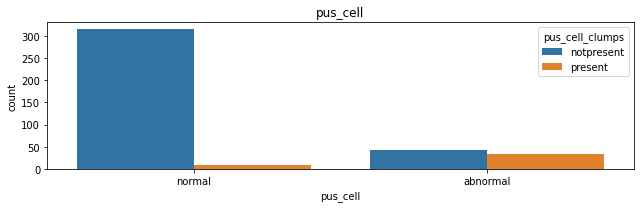

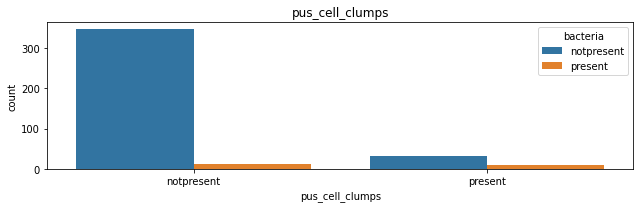

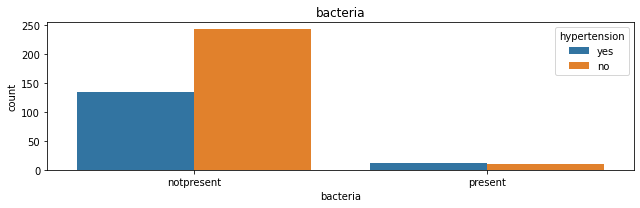

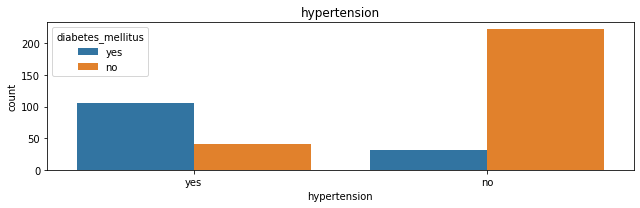

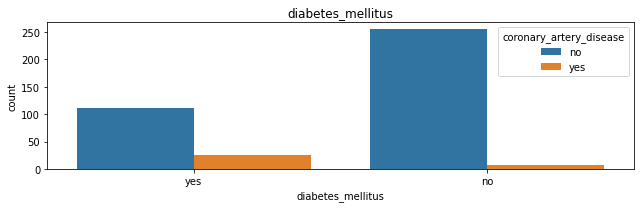

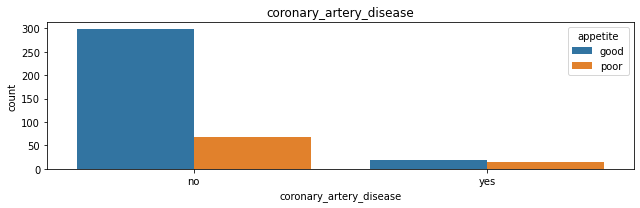

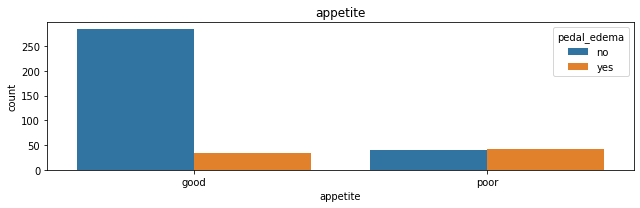

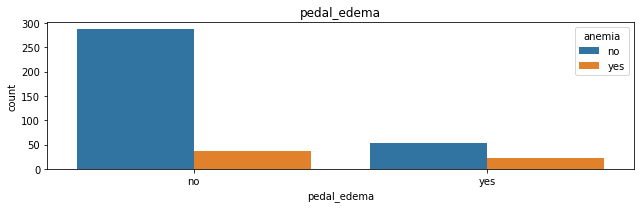

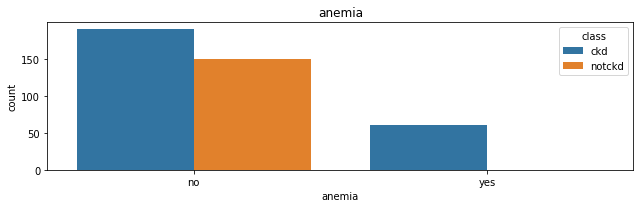

stop


In [ ]:
cat=[]
for data in df:
    if (df[data].dtypes== 'object'):
      cat.append(data)

for i in range(0, len(cat)) :
        j =0
        j = i+1
        if j < len(cat) :
          plt.figure(figsize=(9,3))
          sns.countplot(x=df[cat[i]],hue= df[cat[j]], data=df)
          plt.title(cat[i])
          plt.tight_layout()
          plt.show()
        else :
            print('stop')

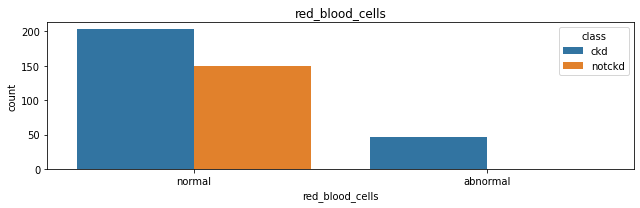

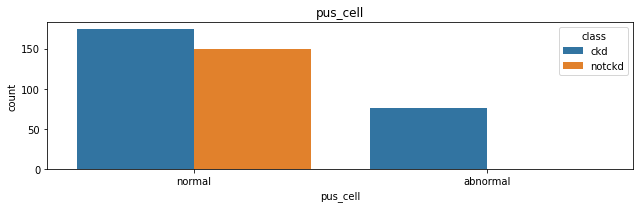

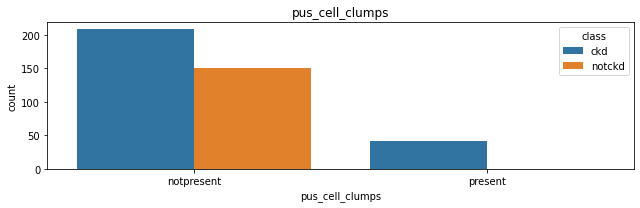

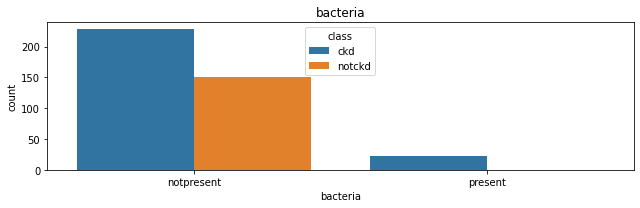

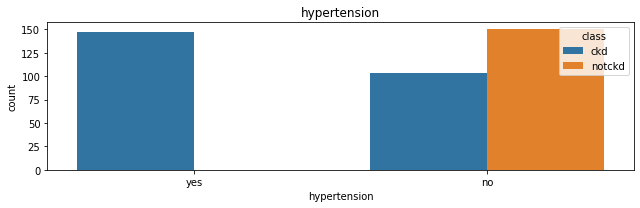

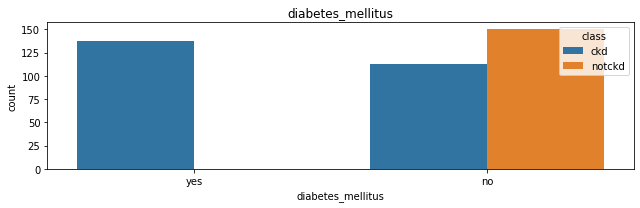

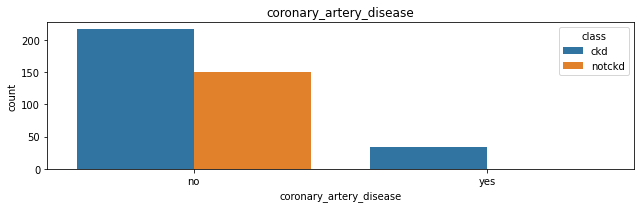

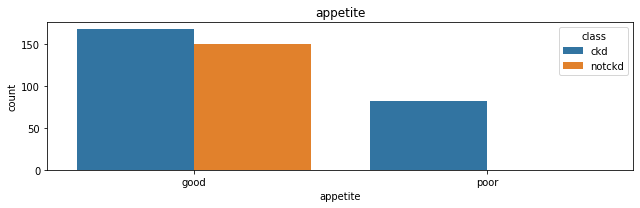

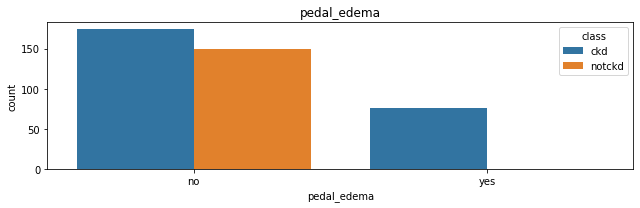

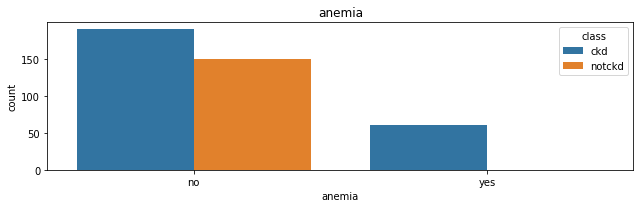

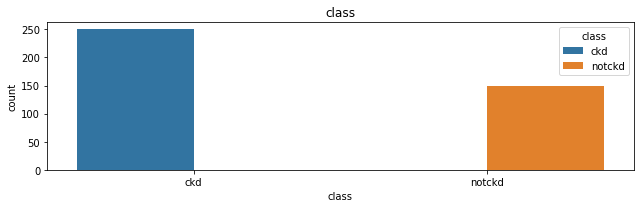

In [ ]:
for data in df:
    if (df[data].dtypes== 'object'):
      plt.figure(figsize=(9,3))
      sns.countplot(x=df[data],hue='class', data=df)
      plt.title(data)
      plt.tight_layout()
      plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


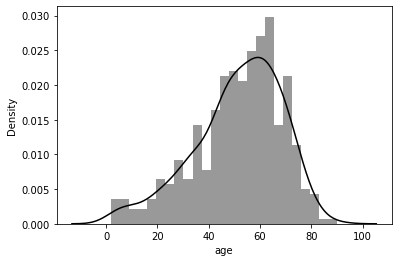

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


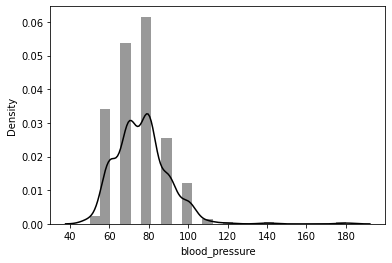

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


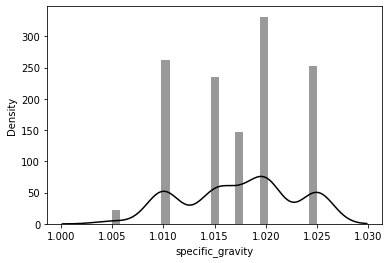

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


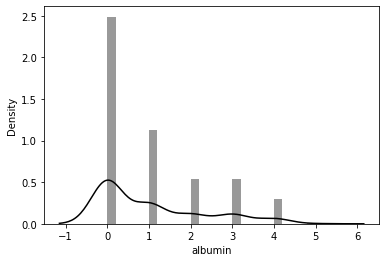

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


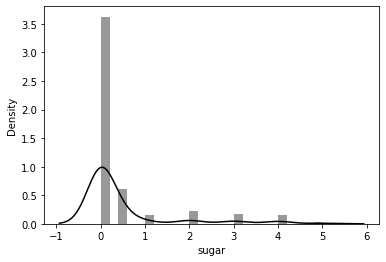

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


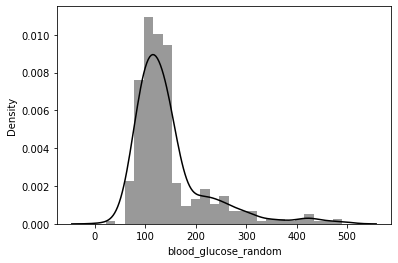

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


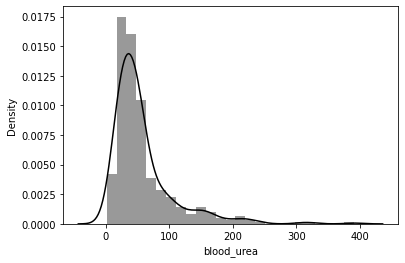

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


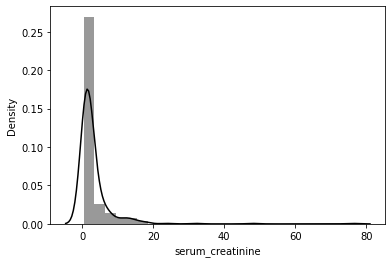

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


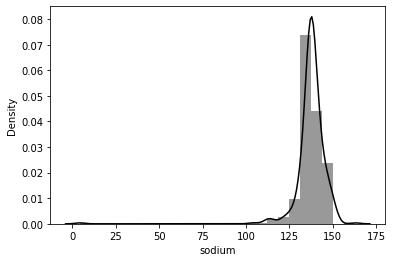

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


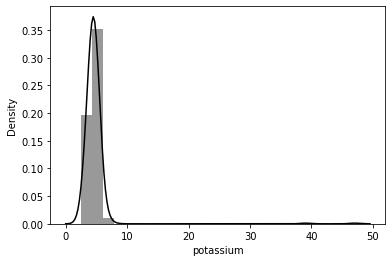

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


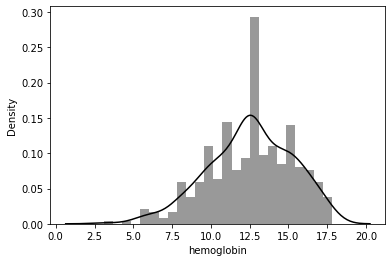

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


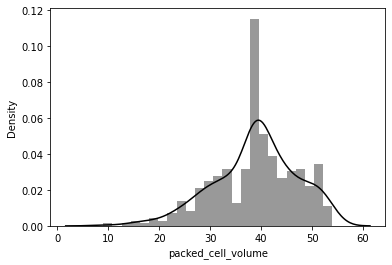

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


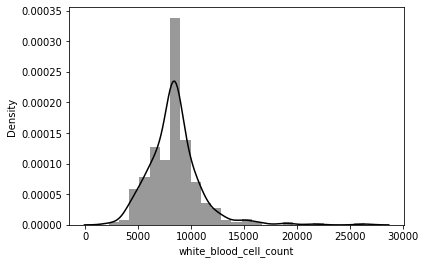

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


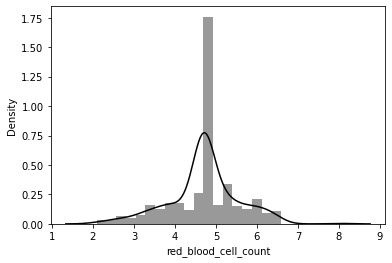

In [ ]:
for data in df:
    if not (df[data].dtypes== 'object'):
        sns.distplot(df.loc[:, data], bins=25,  color='black')
        plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


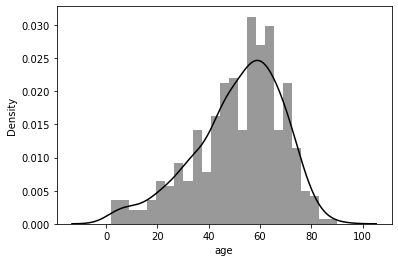

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


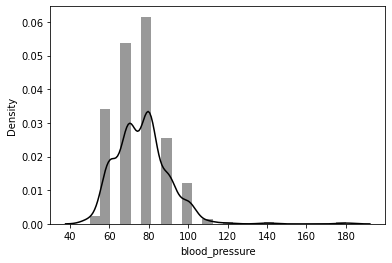

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


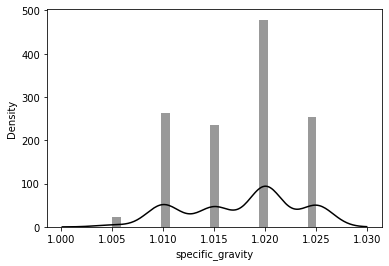

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


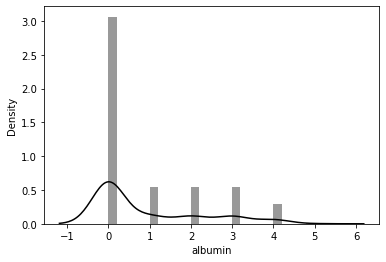

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


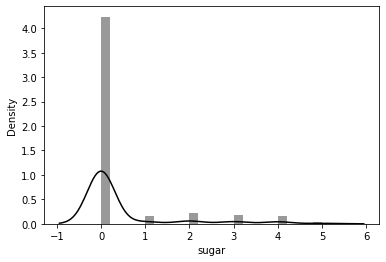

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


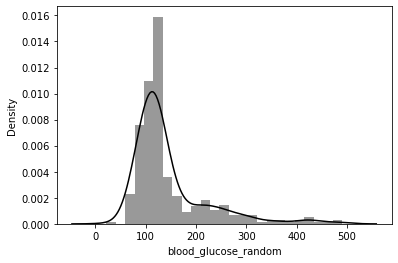

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


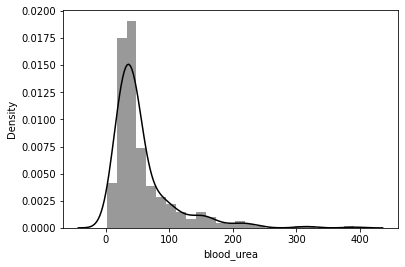

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


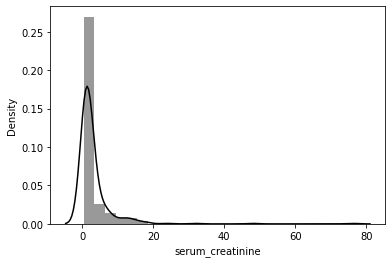

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


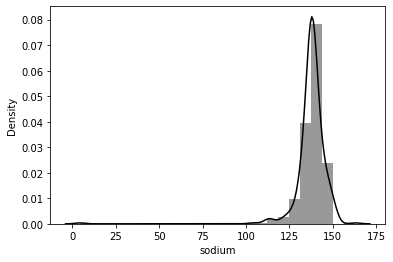

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


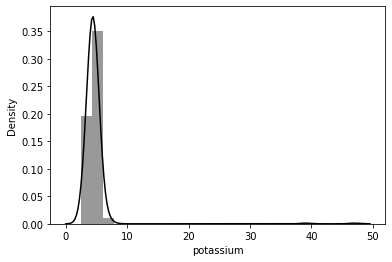

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


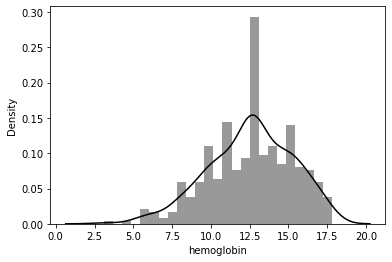

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


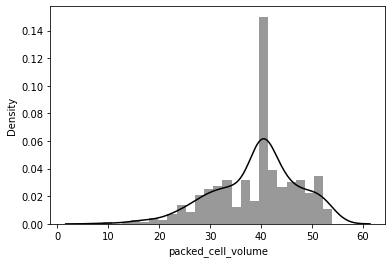

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


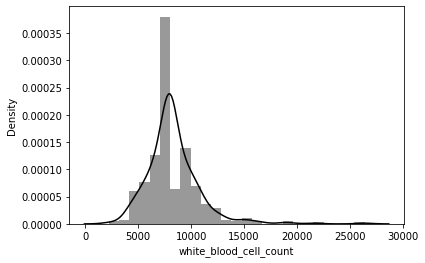

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


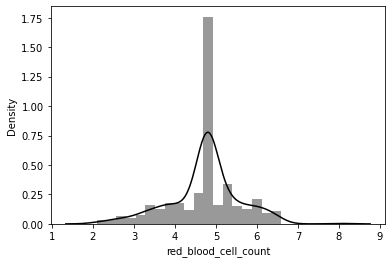

In [ ]:
for data in df1:
    if not (df1[data].dtypes== 'object'):
        sns.distplot(df1.loc[:, data], bins=25,  color='black')
        plt.show()

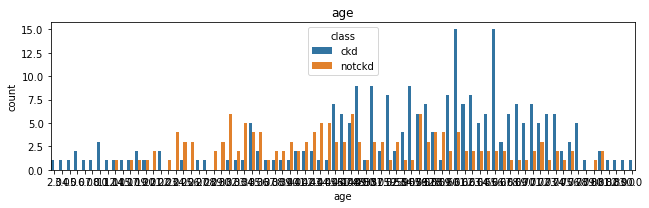

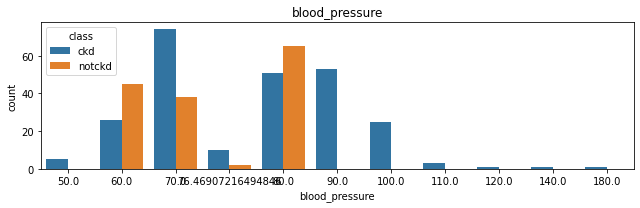

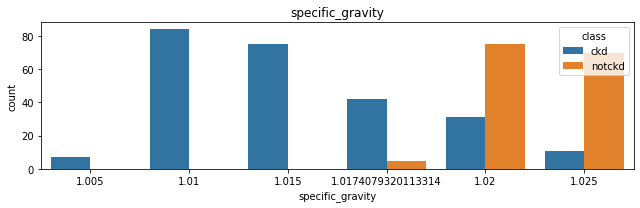

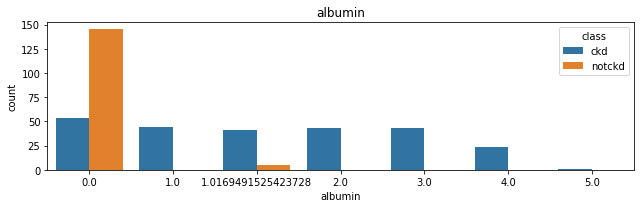

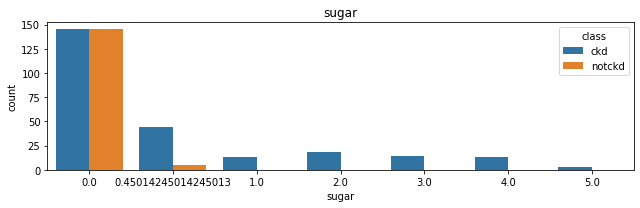

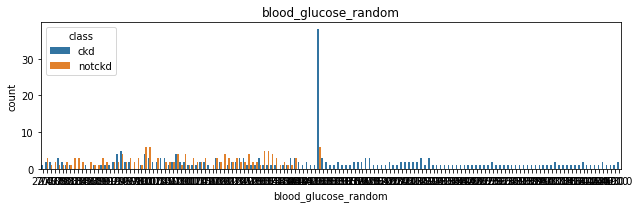

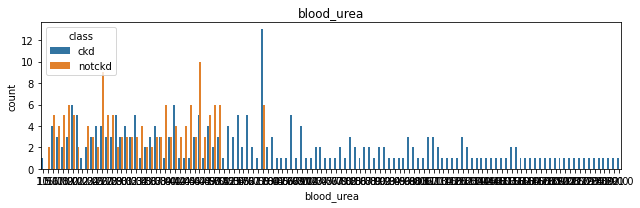

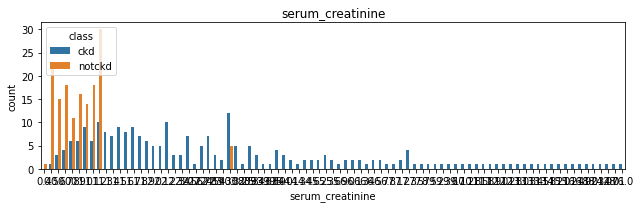

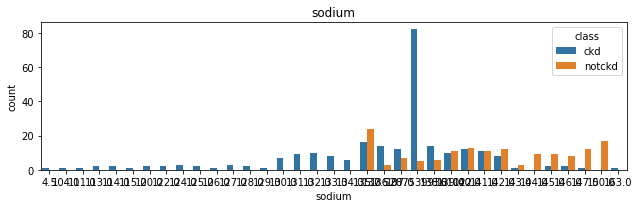

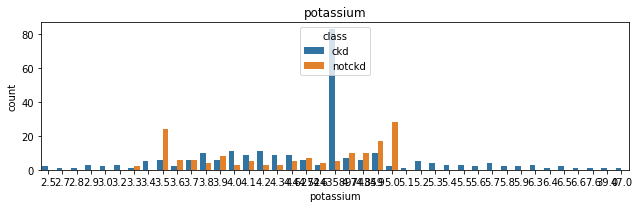

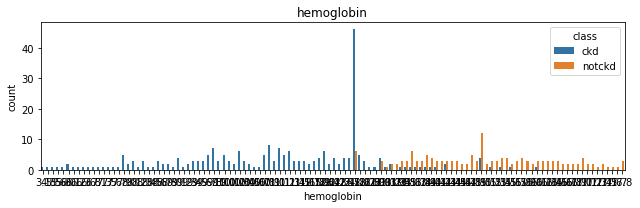

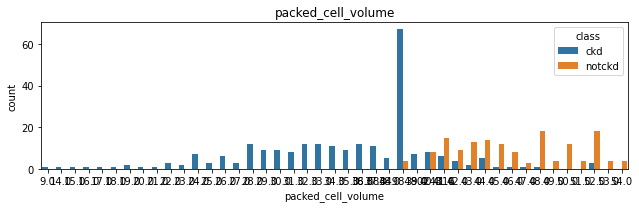

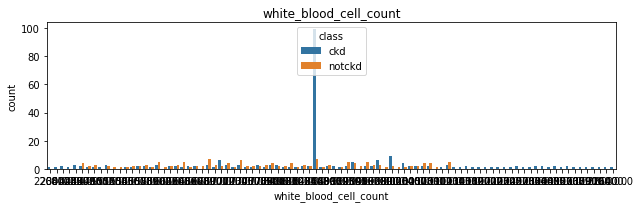

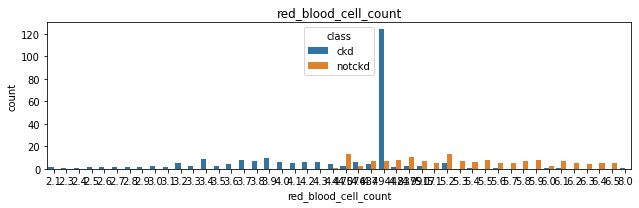

In [ ]:
for data in df:
    if not (df[data].dtypes== 'object'):
      plt.figure(figsize=(9,3))
      sns.countplot(x=df[data],hue='class', data=df)
      plt.title(data)
      plt.tight_layout()
      plt.show()


### Tests Statistiques

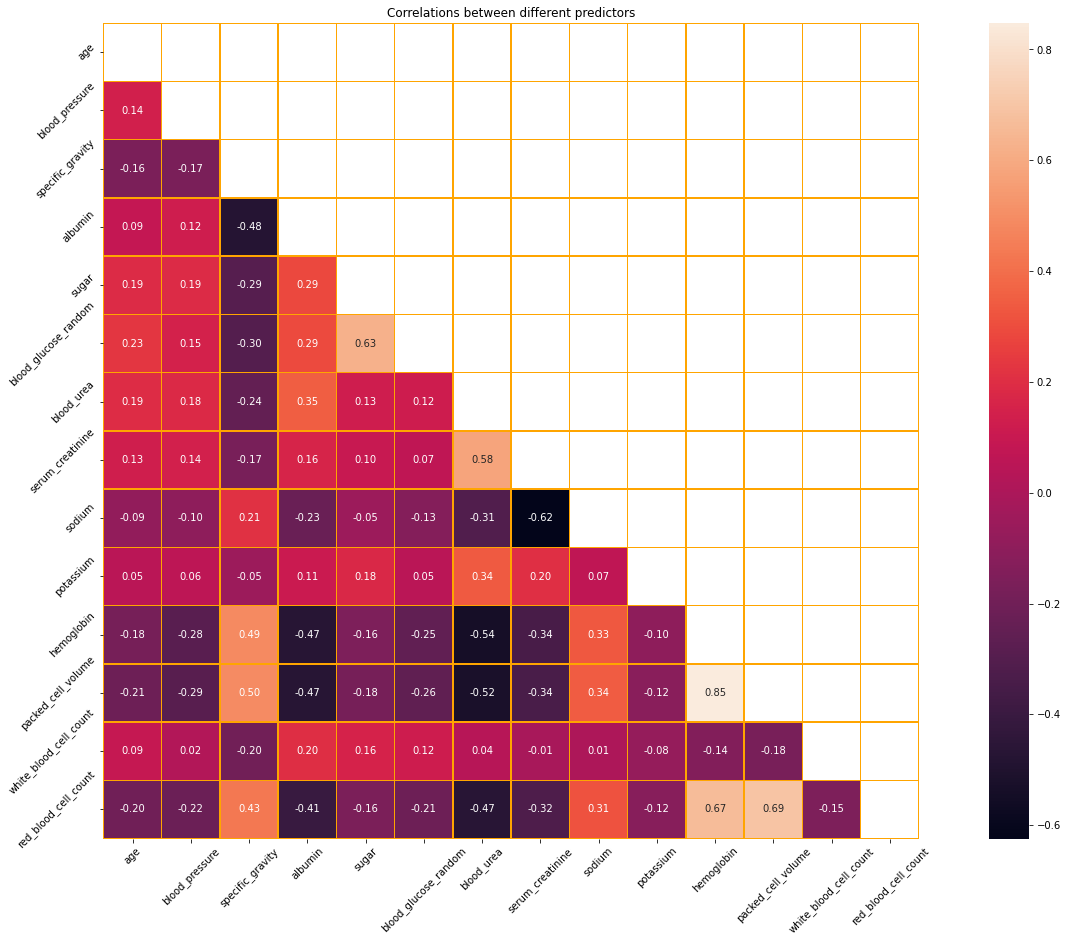

In [ ]:
corr_df = df1.corr()
f,ax=plt.subplots(figsize=(25,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

loi normale

In [ ]:
from scipy.stats import shapiro

for data in df:
  if not (df[data].dtypes== 'object'):
    stat, p = shapiro(df[data])
    print(data)
    print( 'Statistics\n(W)= %e,\n p = %e' % ( stat, p ) ) # will produce:

 # interpret
 #if p > 0.05:distribution of the sample is significantly different from a normal distribution (reject H0)
#p<0.05 distribution of the sample is not significantly different from a normal distribution (fail to reject H0)







age
Statistics
(W)= 9.647536e-01,
 p = 3.200561e-08
blood_pressure
Statistics
(W)= 8.695899e-01,
 p = 7.956051e-18
specific_gravity
Statistics
(W)= 9.059959e-01,
 p = 4.916023e-15
albumin
Statistics
(W)= 7.751079e-01,
 p = 4.758047e-23
sugar
Statistics
(W)= 5.017467e-01,
 p = 5.677309e-32
blood_glucose_random
Statistics
(W)= 7.717584e-01,
 p = 3.354722e-23
blood_urea
Statistics
(W)= 7.233480e-01,
 p = 3.179971e-25
serum_creatinine
Statistics
(W)= 3.983245e-01,
 p = 2.582107e-34
sodium
Statistics
(W)= 5.688999e-01,
 p = 3.111418e-30
potassium
Statistics
(W)= 1.843329e-01,
 p = 2.819037e-38
hemoglobin
Statistics
(W)= 9.842186e-01,
 p = 2.368115e-04
packed_cell_volume
Statistics
(W)= 9.727246e-01,
 p = 8.045646e-07
white_blood_cell_count
Statistics
(W)= 8.666829e-01,
 p = 5.051085e-18
red_blood_cell_count
Statistics
(W)= 9.405800e-01,
 p = 1.466129e-11


In [ ]:
yes = df[df['class']=="ckd"]
no = df[df['class']=="notckd"]
numerical_features

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
yes[numerical_features]

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.400000,44.000000,7800.000000,5.200000
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.300000,38.000000,6000.000000,4.707435
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.600000,31.000000,7500.000000,4.707435
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.200000,32.000000,6700.000000,3.900000
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.600000,35.000000,7300.000000,4.600000
...,...,...,...,...,...,...,...,...,...,...,...
245,48.0,100.0,103.000000,79.0,5.3,135.000000,6.300000,6.300000,19.000000,7200.000000,2.600000
246,48.0,110.0,106.000000,215.0,15.2,120.000000,5.700000,8.600000,26.000000,5000.000000,2.500000
247,54.0,90.0,150.000000,18.0,1.2,140.000000,4.200000,12.526437,38.884498,8406.122449,4.707435
248,59.0,70.0,424.000000,55.0,1.7,138.000000,4.500000,12.600000,37.000000,10200.000000,4.100000


In [ ]:
yes[numerical_features].loc[:, ["blood_glucose_random"]]

,blood_glucose_random
0,121.000000
1,148.036517
2,423.000000
3,117.000000
4,106.000000
...,...
245,103.000000
246,106.000000
247,150.000000
248,424.000000


In [ ]:

import scipy.stats as stats
for data in yes[numerical_features]:
  print(data )
  student_t,student_pvalue = stats.ttest_ind(yes[numerical_features].loc[:, [data]],no[numerical_features].loc[:, [data]])
  welch_t,welch_pvalue = stats.ttest_ind(yes[numerical_features].loc[:, [data]],no[numerical_features].loc[:, [data]],equal_var=False)
  man_withney_t,man_withney_pvalue = stats.mannwhitneyu(no[numerical_features].loc[:, [data]],yes[numerical_features].loc[:, [data]])
  print(f'Student test : statistique = {student_t} ; pvalue = {student_pvalue} \nWelch test : statistique = {welch_t} ; pvalue = {welch_pvalue} \nMan-Withney test : statistique = {man_withney_t} ; pvalue = {man_withney_pvalue}')


age
Student test : statistique = [4.61560491] ; pvalue = [5.29566272e-06] 
Welch test : statistique = [4.72504515] ; pvalue = [3.38329112e-06] 
Man-Withney test : statistique = 12605.0 ; pvalue = 2.005314045602985e-08
blood_pressure
Student test : statistique = [6.05892727] ; pvalue = [3.17869473e-09] 
Welch test : statistique = [6.89006923] ; pvalue = [2.19690144e-11] 
Man-Withney test : statistique = 12746.5 ; pvalue = 1.743759599786226e-08
blood_glucose_random
Student test : statistique = [8.74249375] ; pvalue = [6.47071533e-17] 
Welch test : statistique = [10.98904848] ; pvalue = [9.71283282e-24] 
Man-Withney test : statistique = 8489.0 ; pvalue = 2.312692178519785e-20
blood_urea
Student test : statistique = [7.99598754] ; pvalue = [1.41128503e-14] 
Welch test : statistique = [10.09083252] ; pvalue = [1.11821288e-20] 
Man-Withney test : statistique = 9311.5 ; pvalue = 1.6883924880809445e-17
serum_creatinine
Student test : statistique = [6.13829245] ; pvalue = [2.01886855e-09] 
Welc

Transform categorical data

In [ ]:
#we chose label Encoder because we want to give their worth to the survivors
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for data in df:
    if (df[data].dtypes== 'object'):
      df[data]=le.fit_transform(df[data])


In [ ]:
for data in df1:
    if (df1[data].dtypes== 'object'):
      df1[data]=le.fit_transform(df1[data])

In [ ]:
df1

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


### traitement de données

1.   méthode classique
2.   K-Nearest Neighbor Imputation



df1

In [ ]:
df2 = df1[numerical_features1]


In [ ]:
x = df2
y = df1['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
x_train

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
92,71.0,70.0,219.0,82.0,3.6,133.0,4.4,10.40,33.0,5600.0,3.6
223,71.0,90.0,303.0,30.0,1.3,136.0,4.1,13.00,38.0,9200.0,4.6
234,37.0,100.0,121.0,19.0,1.3,138.0,4.4,15.00,44.0,4100.0,5.2
232,50.0,90.0,121.0,42.0,1.3,138.0,4.4,12.65,40.0,8000.0,4.8
377,64.0,70.0,97.0,27.0,0.7,145.0,4.8,13.80,49.0,6400.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...
323,43.0,80.0,130.0,30.0,1.1,143.0,5.0,15.90,45.0,7800.0,4.5
192,46.0,110.0,130.0,16.0,0.9,138.0,4.4,12.65,40.0,8000.0,4.8
117,55.0,70.0,219.0,36.0,1.3,139.0,3.7,12.50,37.0,9800.0,4.4
47,11.0,80.0,121.0,17.0,0.8,138.0,4.4,15.00,45.0,8600.0,4.8


In [ ]:
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

90.71 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = df2
y = df1['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
x_train


,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
92,71.0,70.0,219.0,82.0,3.6,133.0,4.4,10.40,33.0,5600.0,3.6
223,71.0,90.0,303.0,30.0,1.3,136.0,4.1,13.00,38.0,9200.0,4.6
234,37.0,100.0,121.0,19.0,1.3,138.0,4.4,15.00,44.0,4100.0,5.2
232,50.0,90.0,121.0,42.0,1.3,138.0,4.4,12.65,40.0,8000.0,4.8
377,64.0,70.0,97.0,27.0,0.7,145.0,4.8,13.80,49.0,6400.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...
323,43.0,80.0,130.0,30.0,1.1,143.0,5.0,15.90,45.0,7800.0,4.5
192,46.0,110.0,130.0,16.0,0.9,138.0,4.4,12.65,40.0,8000.0,4.8
117,55.0,70.0,219.0,36.0,1.3,139.0,3.7,12.50,37.0,9800.0,4.4
47,11.0,80.0,121.0,17.0,0.8,138.0,4.4,15.00,45.0,8600.0,4.8


In [ ]:
df1.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,16.982996,13.489785,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import statsmodels.api as sm
logit_model= sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.113964
         Iterations 12
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.826     
Dependent Variable:    class             AIC:               85.8199   
Date:                  2021-12-14 11:13  BIC:               125.8026  
No. Observations:      280               Log-Likelihood:    -31.910   
Df Model:              10                LL-Null:           -183.64   
Df Residuals:          269               LLR p-value:       2.8947e-59
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        12.0000                                        
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
age                     0.0380   0.0210  1.8137 0.0697 -0.0031  0.0791
bl

we will drop all the P>|z| > 0.05

In [ ]:
df3=df2[["blood_pressure","blood_glucose_random","serum_creatinine","hemoglobin","sodium"]]

In [ ]:
#features extraction
x = df3
y = df1['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train

,blood_pressure,blood_glucose_random,serum_creatinine,hemoglobin,sodium
250,80.0,140.0,1.2,15.00,135.0
63,70.0,150.0,6.1,7.50,131.0
312,70.0,121.0,1.3,15.30,135.0
159,80.0,303.0,1.3,10.40,122.0
283,70.0,121.0,1.3,16.40,138.0
...,...,...,...,...,...
323,80.0,130.0,1.1,15.90,143.0
192,110.0,130.0,0.9,12.65,138.0
117,70.0,219.0,1.3,12.50,139.0
47,80.0,121.0,0.8,15.00,138.0


In [ ]:
import statsmodels.api as sm
logit_model= sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.135652
         Iterations 12
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.795     
Dependent Variable:  class             AIC:               91.3913   
Date:                2021-12-14 11:13  BIC:               109.9102  
No. Observations:    300               Log-Likelihood:    -40.696   
Df Model:            4                 LL-Null:           -198.21   
Df Residuals:        295               LLR p-value:       6.1900e-67
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      12.0000                                        
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
blood_pressure       -0.0766   0.0289 -2.6489 0.0081 -0.1333 -0.0199
blood_glucose_random -0.046

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


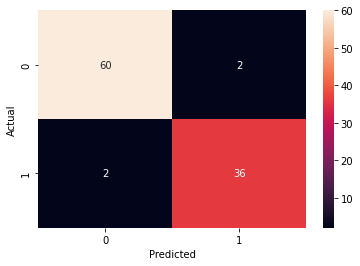

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.95      0.95      0.95        38

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



df

In [ ]:
df4 = df[numerical_features]


In [ ]:
#features extraction
x = df4
y = df['class']
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=0.30,random_state=0)
x1_train

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
92,71.000000,70.0,219.000000,82.000000,3.600000,133.000000,4.400000,10.400000,33.000000,5600.000000,3.600000
223,71.000000,90.0,303.000000,30.000000,1.300000,136.000000,4.100000,13.000000,38.000000,9200.000000,4.600000
234,37.000000,100.0,148.036517,19.000000,1.300000,137.528754,4.627244,15.000000,44.000000,4100.000000,5.200000
232,50.000000,90.0,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
377,64.000000,70.0,97.000000,27.000000,0.700000,145.000000,4.800000,13.800000,49.000000,6400.000000,4.800000
...,...,...,...,...,...,...,...,...,...,...,...
323,43.000000,80.0,130.000000,30.000000,1.100000,143.000000,5.000000,15.900000,45.000000,7800.000000,4.500000
192,46.000000,110.0,130.000000,16.000000,0.900000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
117,51.483376,70.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,37.000000,9800.000000,4.400000
47,11.000000,80.0,148.036517,17.000000,0.800000,137.528754,4.627244,15.000000,45.000000,8600.000000,4.707435


In [ ]:
logit_model= sm.Logit(y1_train, x1_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.129244
         Iterations 11
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.803     
Dependent Variable:    class             AIC:               94.3768   
Date:                  2021-12-14 11:13  BIC:               134.3595  
No. Observations:      280               Log-Likelihood:    -36.188   
Df Model:              10                LL-Null:           -183.64   
Df Residuals:          269               LLR p-value:       1.8636e-57
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        11.0000                                        
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
age                     0.0049   0.0177  0.2801 0.7794 -0.0297  0.0396
bl

we will drop all the P>|z| > 0.05

In [ ]:
df5=df4[["blood_pressure","blood_glucose_random","serum_creatinine","hemoglobin","sodium"]]


In [ ]:
#features extraction
x = df5
y = df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train

,blood_pressure,blood_glucose_random,serum_creatinine,hemoglobin,sodium
250,80.0,140.000000,1.200000,15.000000,135.000000
63,70.0,150.000000,6.100000,7.500000,131.000000
312,70.0,148.036517,3.072454,15.300000,135.000000
159,80.0,303.000000,1.300000,10.400000,122.000000
283,70.0,148.036517,3.072454,16.400000,137.528754
...,...,...,...,...,...
323,80.0,130.000000,1.100000,15.900000,143.000000
192,110.0,130.000000,0.900000,12.526437,137.528754
117,70.0,219.000000,1.300000,12.500000,139.000000
47,80.0,148.036517,0.800000,15.000000,137.528754


In [ ]:

import statsmodels.api as sm
logit_model= sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.147102
         Iterations 10
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.777     
Dependent Variable:  class             AIC:               98.2615   
Date:                2021-12-14 11:14  BIC:               116.7804  
No. Observations:    300               Log-Likelihood:    -44.131   
Df Model:            4                 LL-Null:           -198.21   
Df Residuals:        295               LLR p-value:       1.8794e-65
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      10.0000                                        
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
blood_pressure       -0.0891   0.0294 -3.0258 0.0025 -0.1468 -0.0314
blood_glucose_random -0.051

In [ ]:
x = df.drop(columns="class")
y = df['class']
x_train,x_test,y_train,y_test1 = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


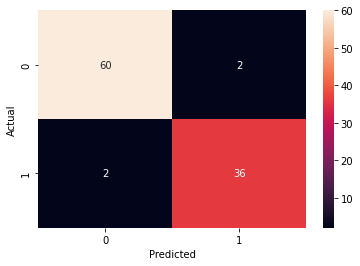

In [ ]:
confusion_matrix = pd.crosstab(y_test1, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.95      0.95      0.95        38

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



 ## Apply KNN and choose the optimal number of neighbors


In [ ]:
k_range = range(1, 31)


In [ ]:
 #KNN and predict your model
 from sklearn.metrics import accuracy_score
x = df.drop(columns="class")
y = df['class']
x_train,x_test,y_train,y_test2 = train_test_split(x,y,test_size=0.25,random_state=0)
 knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))


Acuuracy= 0.68


In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = knn
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance

print('scores:', scores,'Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

scores: [0.83333333 0.73333333 0.7        0.6        0.5        0.73333333
 0.56666667 0.73333333 0.66666667 0.56666667] Accuracy: 0.663 (0.097)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':list(range(1,30)), 'weights': ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
GS = GridSearchCV(KNeighborsClassifier(),
                  param_grid,
                  verbose = 1,
                  cv = 3,
                  n_jobs = -1 )
gs_R = GS.fit(x_train, y_train)

Fitting 3 folds for each of 464 candidates, totalling 1392 fits


KeyboardInterrupt: ignored

In [ ]:
gs_R.best_params_


In [ ]:

knnb=KNeighborsClassifier(algorithm= 'auto',
 metric= 'manhattan',
 n_neighbors= 28,
 weights= 'distance') #build our knn classifier
knnb.fit(x_train,y_train) #Training KNN classifier

KNeighborsClassifier(metric='manhattan', n_neighbors=28, weights='distance')

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = knnb
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('scores:', scores,'Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

scores: [0.83333333 0.8        0.76666667 0.76666667 0.53333333 0.76666667
 0.63333333 0.83333333 0.66666667 0.8       ] Accuracy: 0.740 (0.093)


In [ ]:
acc_knn = round(knnb.score(x_test, y_test2) * 100, 2)
print(round(acc_knn,2,), "%")

74.0 %


In [ ]:
y_pred1=knnb.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test2))


Acuuracy= 0.68


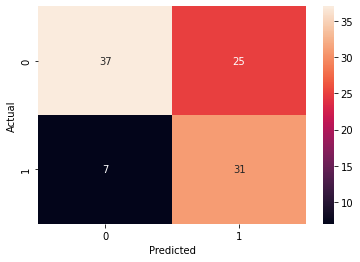

In [ ]:
confusion_matrix = pd.crosstab(y_test2, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76        62
           1       0.61      0.87      0.72        38

    accuracy                           0.74       100
   macro avg       0.75      0.76      0.74       100
weighted avg       0.78      0.74      0.74       100



## decision tree, plot it and calculate the accuracy.

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
dt=decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = dt
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance

print('scores:', scores,'Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [ ]:
param_grid={'criterion':["gini", "entropy"], "splitter" :["best", "random"], 'max_depth' :list(range(1,30)),"max_leaf_nodes":list(range(1,10)) }
G= GridSearchCV(dt, param_grid, verbose = 1, cv = 3, n_jobs = -1 )
gs_R = G.fit(x_train, y_train)

In [ ]:
gs_R.best_params_

In [ ]:

decision_tree = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 15,
 max_leaf_nodes= 20,
 splitter= 'random')
dt=decision_tree.fit(x_train, y_train)

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = dt
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance

print('scores:', scores,'Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

scores: [0.96666667 0.96666667 1.         0.96666667 1.         0.9
 0.93333333 1.         0.96666667 1.        ] Accuracy: 0.970 (0.031)


In [ ]:
Y_pred3= decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

100.0 %


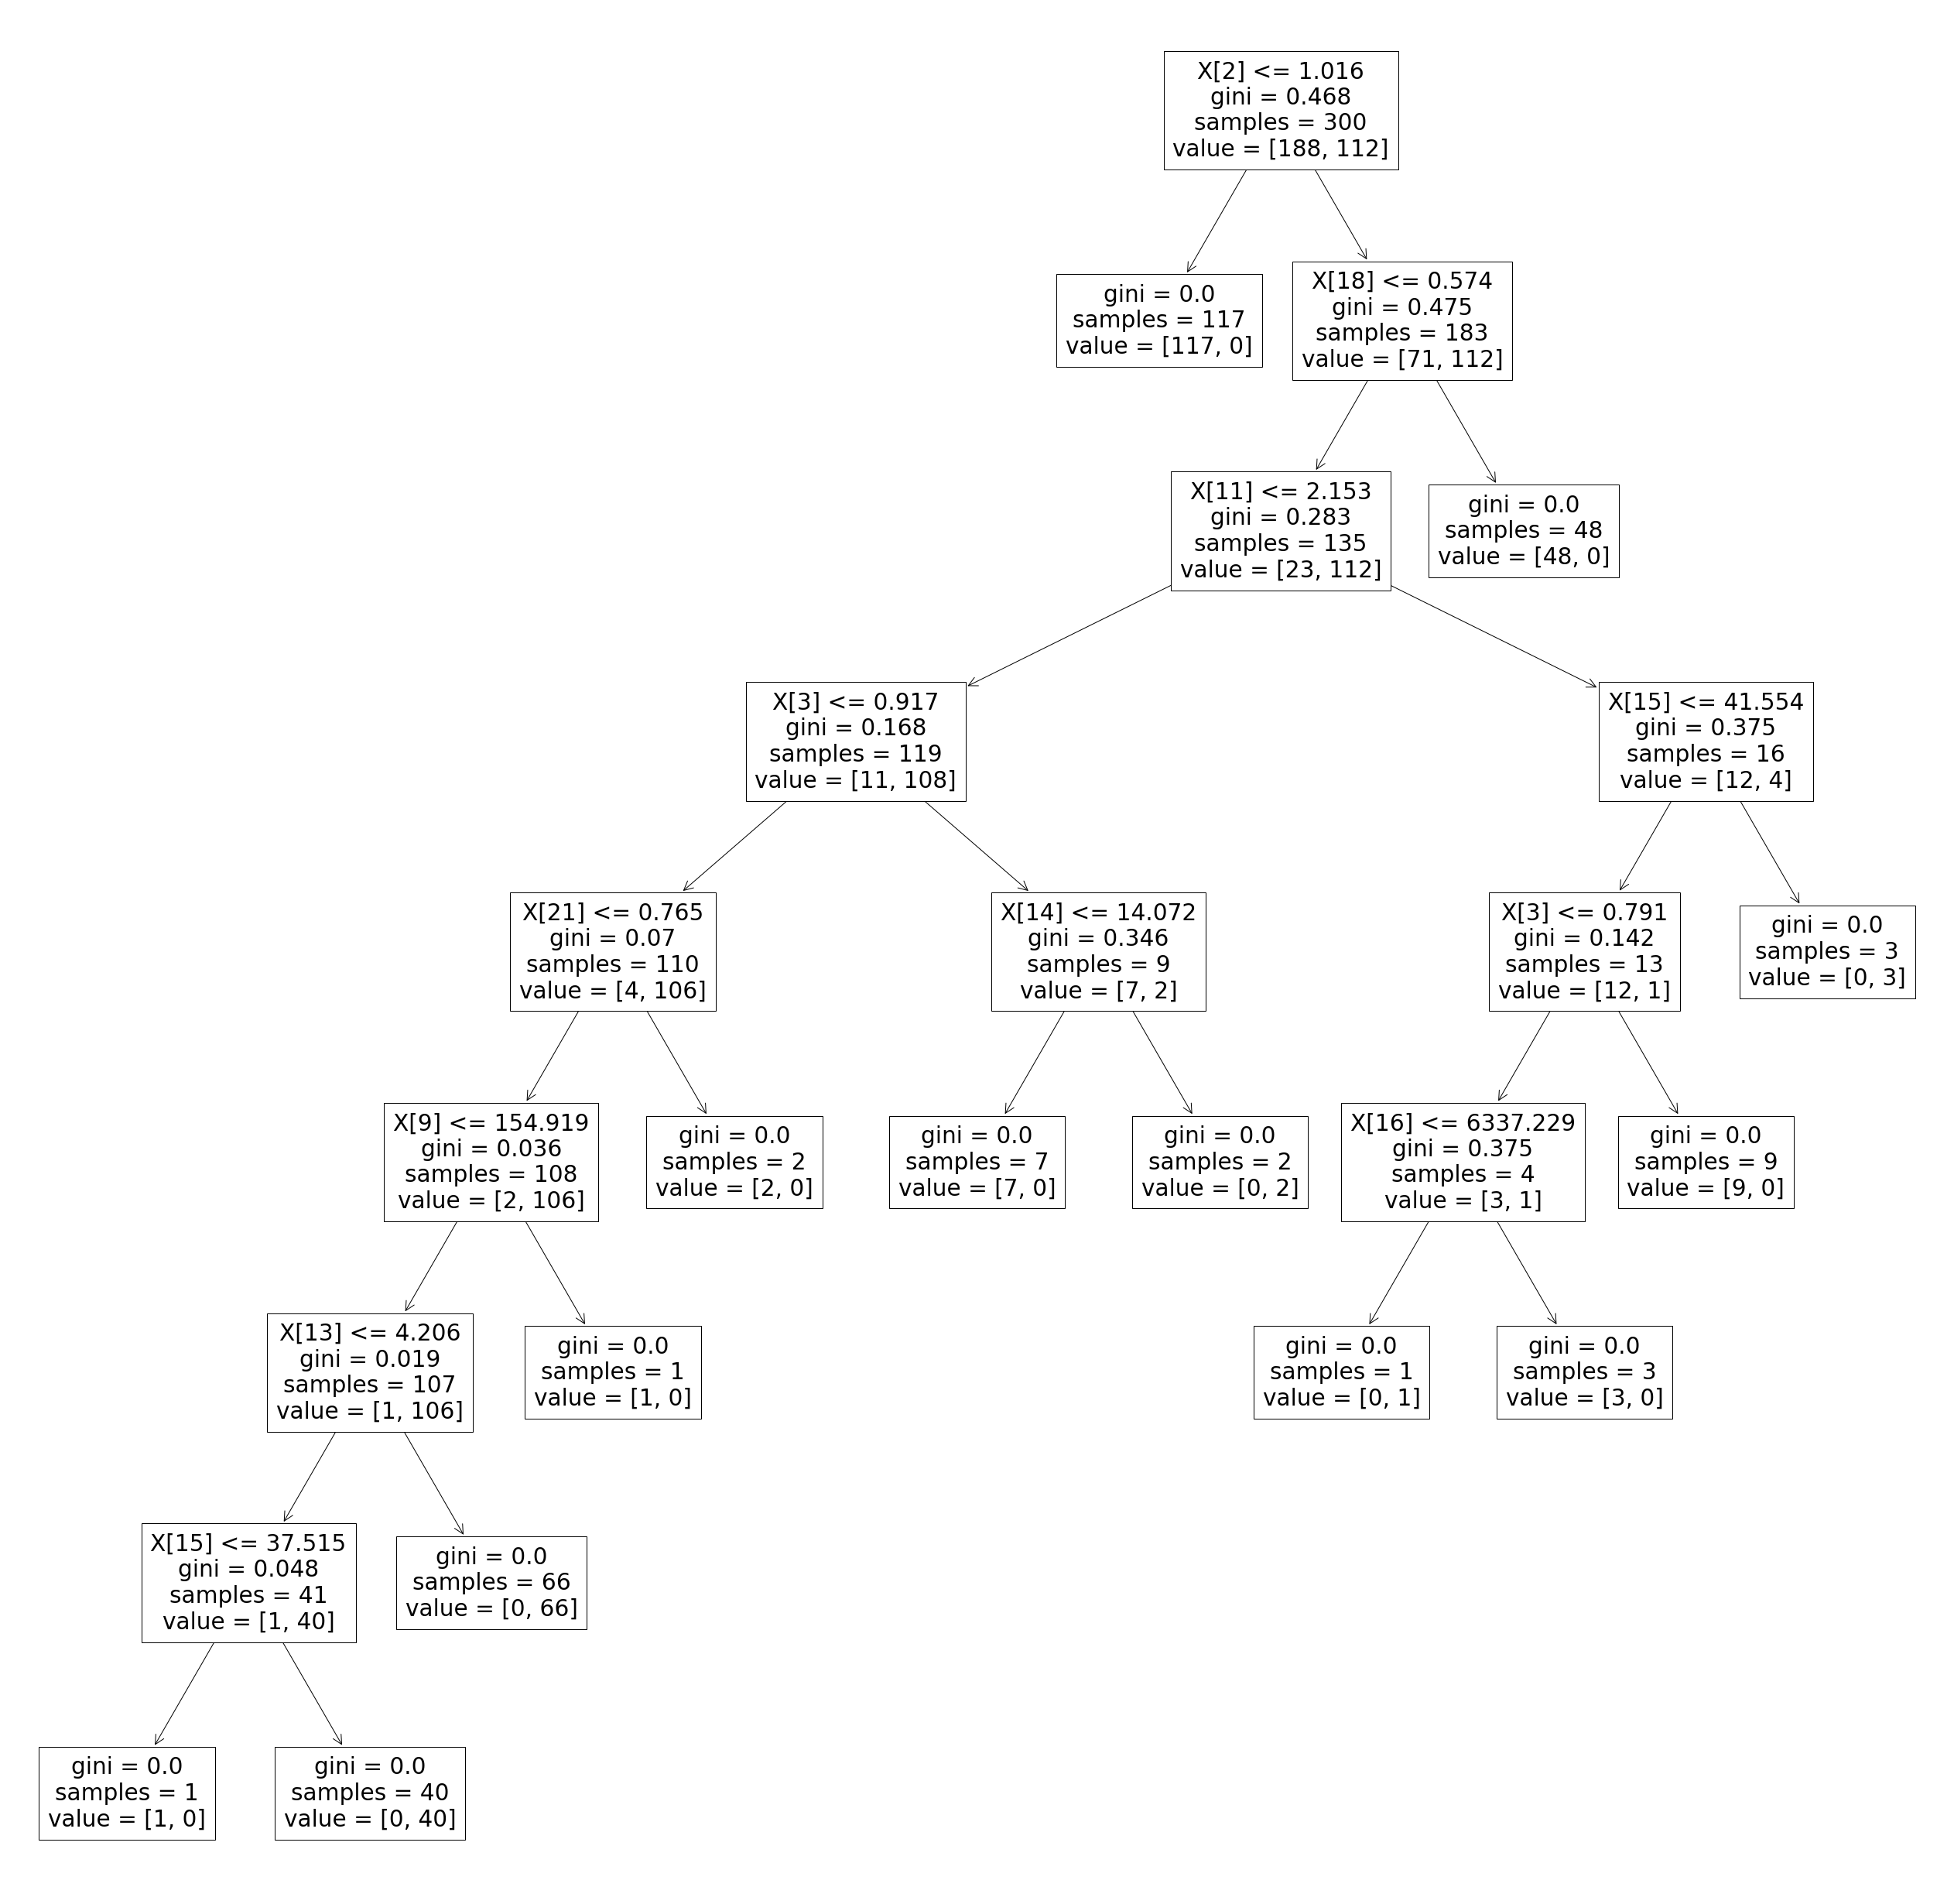

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(45,45))
_ = tree.plot_tree((decision_tree))


# random forest, calculate the new accuracy and compare it with the previous result.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = random_forest
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance

print('scores:', scores,'Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

scores: [0.96666667 0.96666667 1.         1.         0.96666667 1.
 1.         1.         1.         1.        ] Accuracy: 0.990 (0.015)


In [ ]:
param_grid={"n_estimators":list(range(1,31)),'criterion':["gini", "entropy"], 'max_depth' :list(range(1,30)),"max_leaf_nodes":list(range(2,10))}
GS = GridSearchCV(random_forest,
                  param_grid,
                  verbose = 1,
                  cv = 3,
                  n_jobs = -1 )
gs_R = GS.fit(x_train, y_train)

In [ ]:
gs_R.best_params_

In [ ]:
random_forest = RandomForestClassifier(criterion='gini', max_depth=23, max_leaf_nodes= 9, n_estimators= 22)

random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.33 %


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = random_forest
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance

print('scores:', scores,'Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

scores: [0.96666667 0.96666667 1.         1.         0.96666667 0.96666667
 0.93333333 1.         1.         0.96666667] Accuracy: 0.977 (0.021)


In [ ]:
Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.33 %


In [ ]:
#Feature Importance

importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.head(15)


,importance
feature,
packed_cell_volume,0.267
specific_gravity,0.122
albumin,0.114
red_blood_cell_count,0.106
sodium,0.087
hemoglobin,0.056
serum_creatinine,0.047
diabetes_mellitus,0.042
blood_glucose_random,0.039


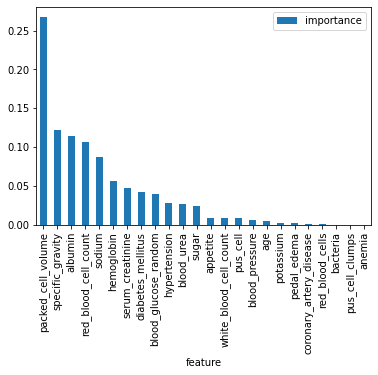

In [ ]:
importances.plot.bar()


In [ ]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression',
              'Random Forest',
              'Decision Tree'],
    'Score': [ acc_knn, acc_log,
              acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Decision Tree
99.33,Random Forest
90.71,Logistic Regression
74.00,KNN


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7062818336162989

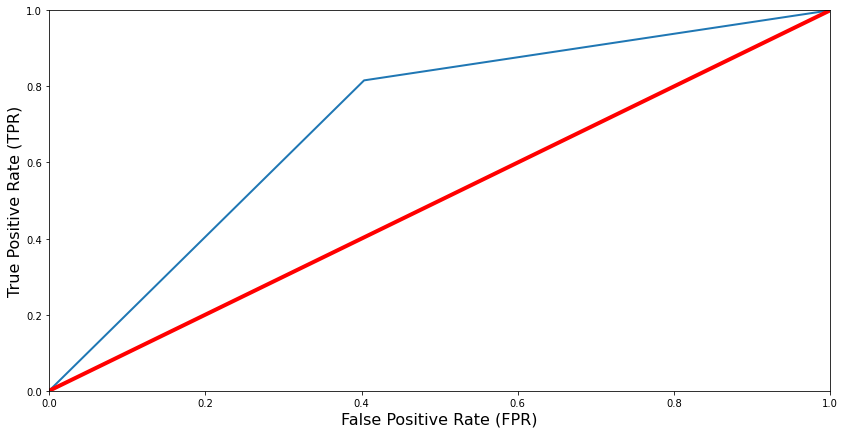

In [ ]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# Part2: unsupervised learning



Drop out the target variable (named “classification”)


In [ ]:
df.drop(columns='class',inplace=True)

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0,0,0,0,0,0


 Use hierarchical clustering to identify the inherent groupings within your data.


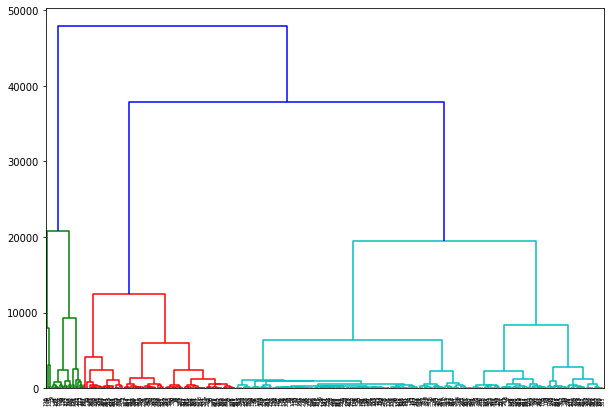

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [ ]:
#clustering algorithm : Agglomerative
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


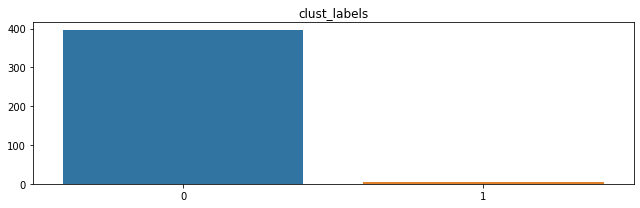

In [ ]:
df1=pd.DataFrame(clust_labels)
plt.figure(figsize=(9,3))
sns.barplot(df1[0].value_counts().index ,df1[0].value_counts().values )
plt.title("clust_labels")
plt.tight_layout()

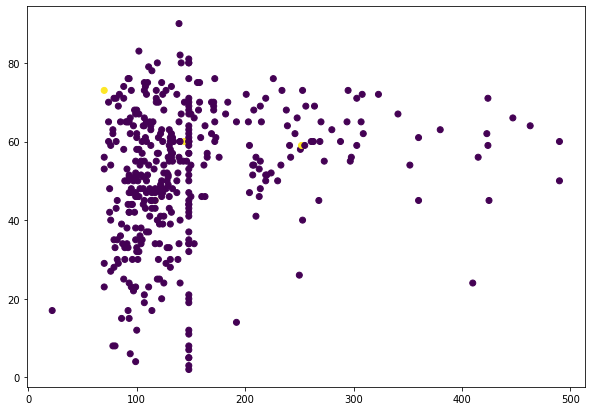

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['blood_glucose_random'], df['age'], c=clust_labels)

KMeans

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.predict(df)


array([0, 2, 0, 2, 0, 0, 0, 2, 0, 3, 0, 2, 3, 0, 3, 2, 0, 0, 3, 2, 0, 2,
       2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 3, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 3, 0, 2, 0, 0, 2, 0, 0, 2,
       3, 0, 3, 3, 2, 2, 3, 0, 0, 0, 2, 3, 0, 3, 2, 3, 0, 2, 2, 3, 3, 0,
       3, 0, 0, 3, 3, 2, 0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 3,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 2, 0, 1, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 3, 0, 2,
       3, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 0, 0, 0, 2, 0, 0, 3, 2, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       3, 3, 3, 0, 2, 0, 3, 2, 3, 3, 0, 2, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0,
       2, 3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 3, 2, 2,
       3, 0, 3, 0, 0, 2, 3, 2, 0, 0, 2, 0, 0, 3, 0,

[[5.24618950e+01 7.60507720e+01 1.01716840e+00 1.02140527e+00
  4.75141447e-01 8.92018779e-01 8.35680751e-01 7.51173709e-02
  4.22535211e-02 1.47642269e+02 5.53847757e+01 2.95034997e+00
  1.38389784e+02 4.61945498e+00 1.24158167e+01 3.88338399e+01
  8.41760084e+03 4.77946140e+00 3.89671362e-01 3.80281690e-01
  7.51173709e-02 2.15962441e-01 2.15962441e-01 1.17370892e-01]
 [5.22500000e+01 7.16666667e+01 1.01250000e+00 2.41666667e+00
  5.83333333e-01 8.33333333e-01 3.33333333e-01 4.16666667e-01
  2.50000000e-01 1.69669710e+02 9.83333333e+01 4.75833333e+00
  1.32921459e+02 4.13787393e+00 1.00000000e+01 2.94166667e+01
  1.74333333e+04 3.66728625e+00 5.83333333e-01 5.83333333e-01
  2.77555756e-17 5.83333333e-01 5.00000000e-01 3.33333333e-01]
 [4.76867605e+01 7.58823104e+01 1.01891663e+00 7.86630762e-01
  2.28985276e-01 8.97196262e-01 8.13084112e-01 9.34579439e-02
  3.73831776e-02 1.37835871e+02 5.81280644e+01 3.31579268e+00
  1.35781344e+02 4.84391924e+00 1.30581910e+01 4.04640514e+01
  5.77

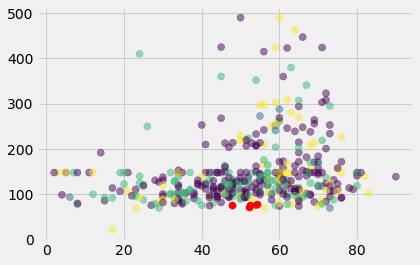

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df['age'], df['blood_glucose_random'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
#select the best one.
kmeans_kwargs = {
        "init" : "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    # A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

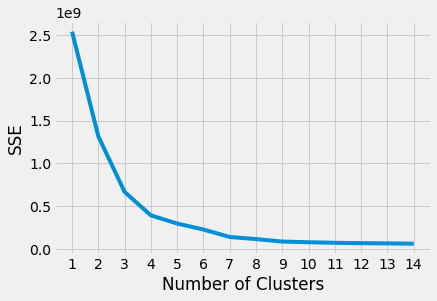

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

!pip install kneed


In [ ]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing" )
kl.elbow

4

In [ ]:
#The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

#How close the data point is to other points in the cluster
#How far away the data point is from points in other clusters
#Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

#In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

#Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:
from sklearn.metrics import silhouette_score

 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  silhouette_coefficients.append(score)

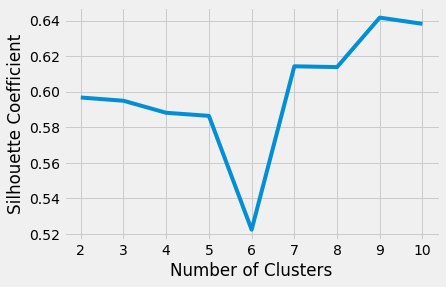

In [ ]:
plt.style.use("fivethirtyeight")
   ...: plt.plot(range(2, 11), silhouette_coefficients)
   ...: plt.xticks(range(2, 11))
   ...: plt.xlabel("Number of Clusters")
   ...: plt.ylabel("Silhouette Coefficient")
   ...: plt.show()